In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

import spacy
from spacy import displacy

import pandas as pd
pd.set_option('max_colwidth', 1000)

In [2]:
%run ../script/webnlg.py

In [3]:
corpus = WebNLGCorpus()

In [4]:
corpus.mdf[corpus.mdf.m_predicate == 'related'].sample(2)

e1 = corpus.get('Food', 1, 'Id151')
e2 = corpus.get('Food', 2, 'Id259')

In [5]:
e1.lexes

,category,eid,ntriples,size,comment,lid,ltext
0,Food,Id151,1,1,good,Id1,The dish bhajji is related to pakora.
1,Food,Id151,1,1,good,Id2,Bhajji is a snack that is similar to Pakora.
2,Food,Id151,1,1,good,Id3,bhajji and pakora are related.


In [6]:
e2.lexes

,category,eid,ntriples,size,comment,lid,ltext
0,Food,Id259,2,2,good,Id1,Bhajji and pakora are related and cauliflower can be used as a variation in pakora.
1,Food,Id259,2,2,good,Id2,"Pakora, similar to Bahajji, can include cauliflower."
2,Food,Id259,2,2,good,Id3,The dish bhajji is related to pakora and cauliflower can be used in it.


In [7]:
s1 = e1.lexes.ltext.values[0]
s2 = e2.lexes.ltext.values[2]

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
doc1 = nlp(s1)
displacy.render(doc1, style='dep', jupyter=True)

In [10]:
doc2 = nlp(s2)
displacy.render(doc2, style='dep', jupyter=True)

In [12]:
import networkx as nx

In [30]:
g = nx.DiGraph()

for token in doc1:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text, dep=token.dep_, pos=token.pos_)

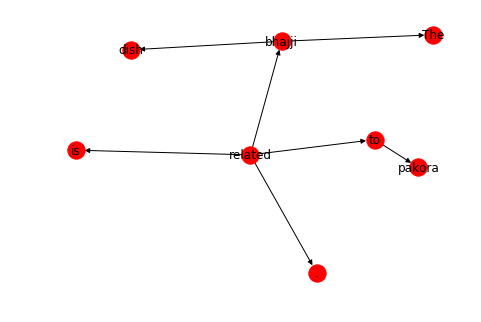

In [32]:
nx.draw(g, with_labels=True)

In [13]:
g = nx.DiGraph()

for token in doc1:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text, dep=token.dep_, pos=token.pos_)
        
for token in doc2:
    
    if token.dep_ != 'ROOT':
        
        g.add_edge(token.head.text, token.text)

In [24]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)

[('related', 0.3571428571428571),
 ('used', 0.2857142857142857),
 ('bhajji', 0.21428571428571427),
 ('pakora', 0.21428571428571427),
 ('to', 0.14285714285714285),
 ('in', 0.14285714285714285),
 ('The', 0.07142857142857142),
 ('dish', 0.07142857142857142),
 ('is', 0.07142857142857142),
 ('.', 0.07142857142857142),
 ('and', 0.07142857142857142),
 ('cauliflower', 0.07142857142857142),
 ('can', 0.07142857142857142),
 ('be', 0.07142857142857142),
 ('it', 0.07142857142857142)]

In [25]:
sorted(nx.pagerank(g).items(), key=lambda x: x[1], reverse=True)

[('it', 0.09841721296535486),
 ('pakora', 0.09207951354305675),
 ('and', 0.08530089125964888),
 ('cauliflower', 0.08530089125964888),
 ('The', 0.06912314122433977),
 ('dish', 0.06912314122433977),
 ('can', 0.06147101711810078),
 ('be', 0.06147101711810078),
 ('in', 0.06147101711810078),
 ('bhajji', 0.0540150776527372),
 ('is', 0.0540150776527372),
 ('to', 0.0540150776527372),
 ('.', 0.0540150776527372),
 ('used', 0.0540150776527372),
 ('related', 0.046166768905622796)]

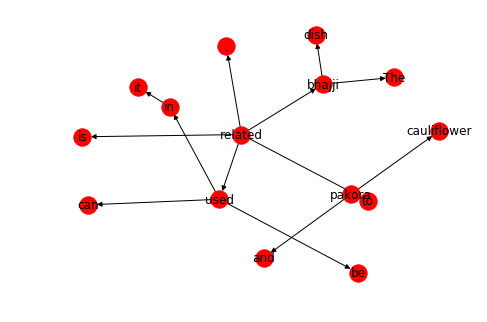

In [20]:
nx.draw(g, with_labels=True)

In [26]:
g = nx.DiGraph()

for lexe_set in corpus.ldf.ltext:
    
    doc = nlp(lexe_set)
    
    for token in doc:
    
        if token.dep_ != 'ROOT':
        
            g.add_edge(token.head.text, token.text)

In [27]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1], reverse=True)[:10]

[('is', 0.4450887366016517),
 ('of', 0.2999472851871376),
 ('in', 0.2344052011948691),
 (',', 0.22228079423651378),
 ('and', 0.19170620277631348),
 ('the', 0.16798453698822702),
 ('has', 0.1653487963451063),
 ('are', 0.11614830434018626),
 ('.', 0.10859251449657353),
 ('located', 0.09646810753821825)]

In [28]:
sorted(nx.pagerank(g).items(), key=lambda x: x[1], reverse=True)[:10]

[('-', 0.033189090611849305),
 ('.', 0.02507342175830071),
 ('the', 0.020797308793008545),
 (',', 0.019704721193360603),
 ('and', 0.019264667891163927),
 ('AC-130', 0.016378151772114647),
 ('in', 0.015600617311120465),
 ('of', 0.0109740368556396),
 ('The', 0.00832417930191846),
 ('also', 0.008241677809413643)]

In [29]:
sorted(nx.betweenness_centrality(g).items(), key=lambda x: x[1], reverse=True)[:10]

[('is', 0.19505432395259495),
 ('of', 0.10904888071620165),
 ('in', 0.10418492347092799),
 ('has', 0.04577284456922048),
 (',', 0.038217861980159085),
 ('the', 0.029481900076933742),
 ('-', 0.0229065838551436),
 ('are', 0.02038850301117498),
 ('as', 0.019118117794827996),
 ('1', 0.016434809352375075)]